# Analysis of the data

## January 2015 - December 2018, buoy_ohare_lake

### Data Sources
#### [CHICAGO OHARE INTERNATIONAL AIRPORT, IL US](https://www.ncdc.noaa.gov/cdo-web/results)
 - Source: [National Centers for Environmental Information](https://www.ncdc.noaa.gov/cdo-web/search)  
 - [GHCN (Global Historical Climatology Network) – Daily Documentation](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf)
  - ID	GHCND:USW00094846  
    41.995 N 87.9336 W 

#### [Station FSTI2 - Foster Ave., Chicago, IL](https://www.ndbc.noaa.gov/station_page.php?station=fsti2)
 - Source: [National Data Buoy Center](https://www.ndbc.noaa.gov/)

 - Owned and maintained by [Chicago Park District](https://www.ndbc.noaa.gov/ndbcexit.php?url=https://wqdatalive.com/public/16&blurb=Chicago+Park+District)  
    41.976 N 87.648 W (41°58'35" N 87°38'51" W)
    
#### [Lake Michigan](https://www.google.com/search?q=lake+michigan&oq=lake+michigan&aqs=chrome.0.69i59j69i60l3j69i59j0.3015j0j9&sourceid=chrome&ie=UTF-8)
 - Source: [Great Lakes Statistics: Average Surface Water Temperature from the Great Lakes Surface Environmental Analysis (GLSEA)](https://coastwatch.glerl.noaa.gov/statistic/statistic.html)
 - 44.0 -87.0 (44° 00' 0.00" N 87° 00' 0.00" W)
 - [Data Set for 2018](https://coastwatch.glerl.noaa.gov/ftp/glsea/avgtemps/2018/glsea-temps2018_1024.dat)

#### Data Dictionary

 - **lake_temp (Celsius)** - Average Daily Surface Water Temperature for Lake Michigan 
 - **buoy_wdir (degT)** - Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD. (WDIR) 
 - **buoy_wspd (m/s)** - Wind speed averaged over an eight-minute period for buoys and a two-minute period for land stations. Reported Hourly.
 - **buoy_atmp (Celsius)** - Air temperature
 - **ohare_wspd** - Average daily wind speed (AWND) (meters per second or miles per hour as per user preference) 
 - **ohare_atmp** - Average Temperature (TAVG) ()
 - **ohare_w2dir** - Direction of fastest 2-minute wind (WDF2) (degrees)
 - **ohare_w2spd** - Fastest 2-minute wind speed (WSF2) (miles per hour or meters per second as per user preference)

 "The five core values are:"
 - **ohare_prcp** - Precipitation (PRCP) (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
 - **ohare_snfall** - Snowfall (SNOW) (mm or inches as per user preference, inches to tenths on Daily Form pdf file)
 - **ohare_sndpth** - Snow depth (SNWD) (mm or inches as per user preference, inches on Daily Form pdf file) 
 - **ohare_maxtmp** - Maximum temperature (TMAX) (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths
on Daily Form pdf file
 - **ohare_mintmp** - Minimum temperature (TMIN) (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file
  
 [Bouy Data Dictionary](https://www.ndbc.noaa.gov/measdes.shtml)  
 [O'Hare Airport Data Dictionary](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import time

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras.models import Sequential

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


## Averages

In [2]:
df = pd.read_csv('data/merged/jan012015_dec312018_averages.csv')
print(df.shape)
df.head()

(1461, 14)


,DATE,lake_temp,buoy_wdir,buoy_wspd,buoy_atmp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,2015-01-01,3.53,238.333333,9.890476,-5.928571,14.54,0.00,0.0,0.0,20.0,32,14,240,23.9
1,2015-01-02,3.50,216.086957,6.230435,-2.204348,4.70,0.00,0.0,0.0,26.0,34,15,150,12.1
2,2015-01-03,3.49,181.916667,5.654167,0.395833,5.59,0.57,0.4,0.0,31.0,34,29,140,13.0
3,2015-01-04,3.36,313.750000,8.779167,-1.545833,15.88,0.13,2.2,1.2,29.0,33,2,320,25.9
4,2015-01-05,3.16,262.166667,9.537500,-16.145833,10.29,0.15,1.8,2.0,2.0,6,-3,310,21.9


In [3]:
df.dtypes

DATE             object
lake_temp       float64
buoy_wdir       float64
buoy_wspd       float64
buoy_atmp       float64
ohare_wspd      float64
ohare_prcp      float64
ohare_snfall    float64
ohare_sndpth    float64
ohare_atmp      float64
ohare_maxtmp      int64
ohare_mintmp      int64
ohare_w2dir       int64
ohare_w2spd     float64
dtype: object

In [ ]:
g = sns.PairGrid(df.drop(columns='DATE'))
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show()

/Users/blakewallace/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/_kernel_base.py:513: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1557: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/blakewallace/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1558: UserWarning: Warning: converting a masked element to nan.
  self.

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

In [12]:
df.dtypes

DATE             object
lake_temp       float64
buoy_wdir       float64
buoy_wspd       float64
buoy_atmp       float64
ohare_wspd      float64
ohare_prcp      float64
ohare_snfall    float64
ohare_sndpth    float64
ohare_atmp      float64
ohare_maxtmp      int64
ohare_mintmp      int64
ohare_w2dir       int64
ohare_w2spd     float64
dtype: object

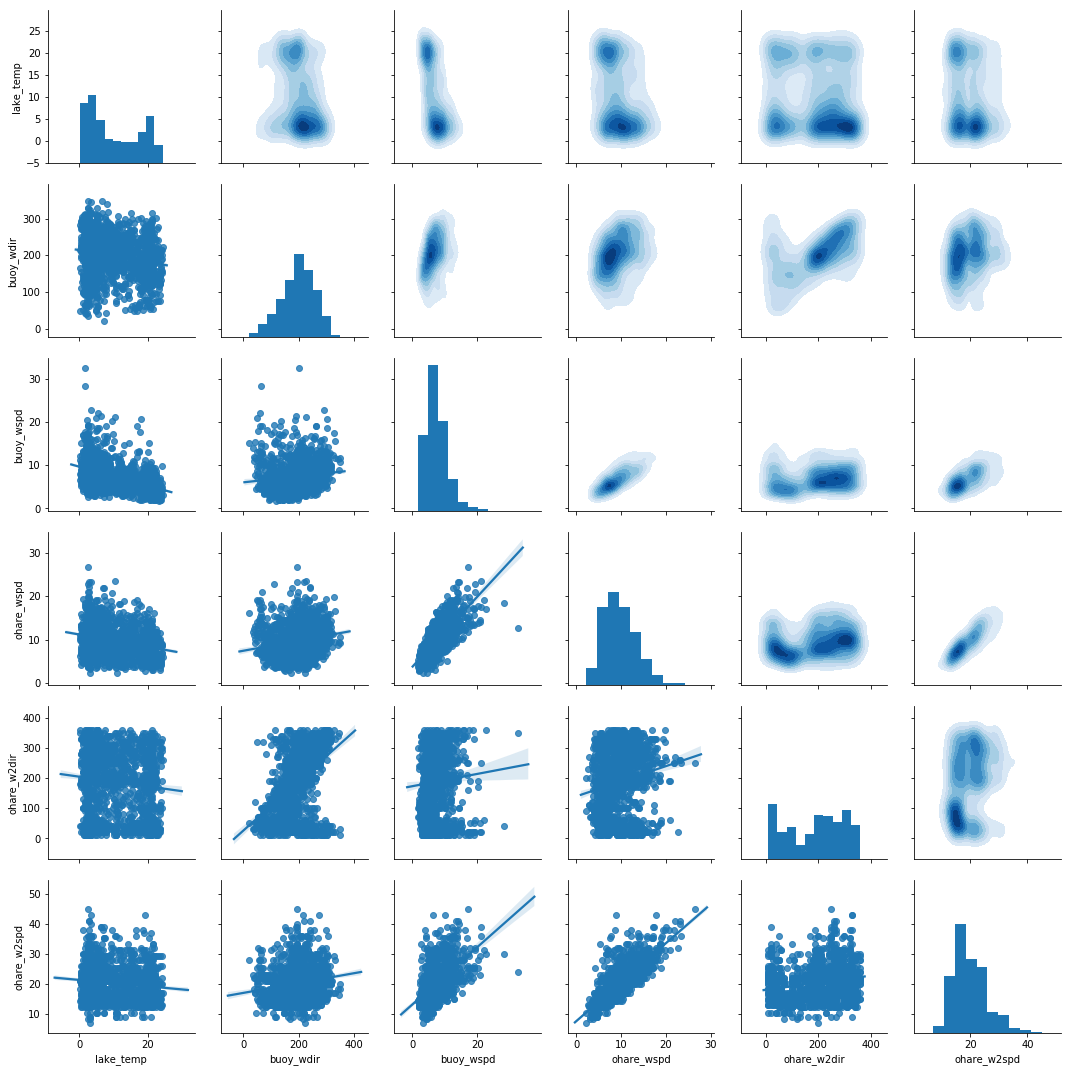

In [13]:
g = sns.PairGrid(df[['lake_temp', 'buoy_wdir', 'buoy_wspd', 'ohare_wspd', 'ohare_w2dir', 'ohare_w2spd']])
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show()

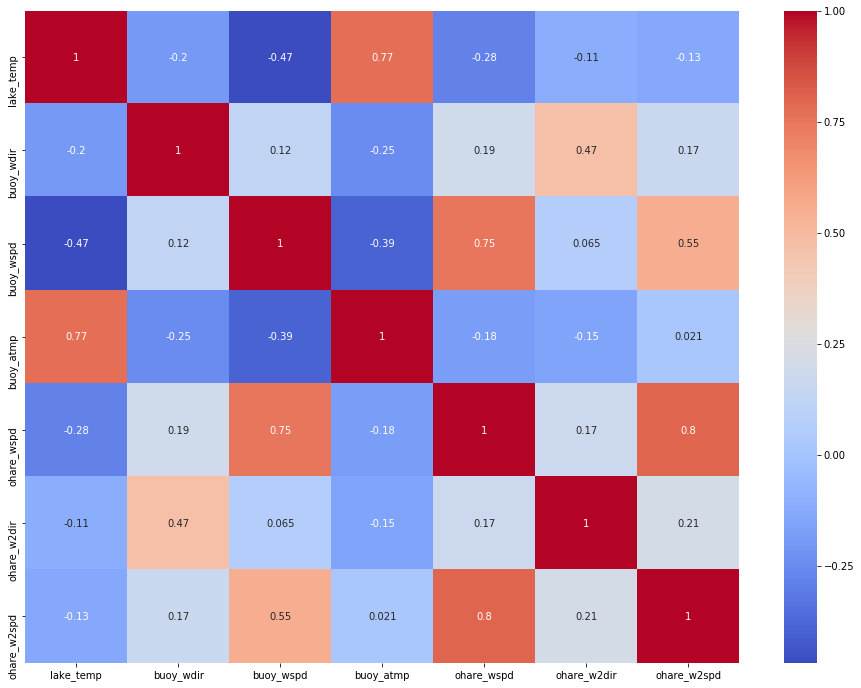

In [21]:
plt.figure(figsize=(16, 12))
sns.heatmap(df[['lake_temp', 'buoy_wdir', 'buoy_wspd', 'buoy_atmp', 'ohare_wspd', 'ohare_w2dir', 'ohare_w2spd']].corr(), 
            annot=True, cmap='coolwarm');

In [15]:
df.head()

,DATE,lake_temp,buoy_wdir,buoy_wspd,buoy_atmp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,2015-01-01,3.53,238.333333,9.890476,-5.928571,14.54,0.00,0.0,0.0,20.0,32,14,240,23.9
1,2015-01-02,3.50,216.086957,6.230435,-2.204348,4.70,0.00,0.0,0.0,26.0,34,15,150,12.1
2,2015-01-03,3.49,181.916667,5.654167,0.395833,5.59,0.57,0.4,0.0,31.0,34,29,140,13.0
3,2015-01-04,3.36,313.750000,8.779167,-1.545833,15.88,0.13,2.2,1.2,29.0,33,2,320,25.9
4,2015-01-05,3.16,262.166667,9.537500,-16.145833,10.29,0.15,1.8,2.0,2.0,6,-3,310,21.9


In [25]:
df.DATE = pd.to_datetime(df.DATE)
df.dtypes

DATE            datetime64[ns]
lake_temp              float64
buoy_wdir              float64
buoy_wspd              float64
buoy_atmp              float64
ohare_wspd             float64
ohare_prcp             float64
ohare_snfall           float64
ohare_sndpth           float64
ohare_atmp             float64
ohare_maxtmp             int64
ohare_mintmp             int64
ohare_w2dir              int64
ohare_w2spd            float64
dtype: object

In [31]:
df.set_index('DATE', inplace=True)
df.sort_index(inplace=True)
print(df.shape)
df.head()

(1461, 13)


,lake_temp,buoy_wdir,buoy_wspd,buoy_atmp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
DATE,,,,,,,,,,,,,
2015-01-01,3.53,238.333333,9.890476,-5.928571,14.54,0.00,0.0,0.0,20.0,32,14,240,23.9
2015-01-02,3.50,216.086957,6.230435,-2.204348,4.70,0.00,0.0,0.0,26.0,34,15,150,12.1
2015-01-03,3.49,181.916667,5.654167,0.395833,5.59,0.57,0.4,0.0,31.0,34,29,140,13.0
2015-01-04,3.36,313.750000,8.779167,-1.545833,15.88,0.13,2.2,1.2,29.0,33,2,320,25.9
2015-01-05,3.16,262.166667,9.537500,-16.145833,10.29,0.15,1.8,2.0,2.0,6,-3,310,21.9


In [34]:
pd.options.display.max_rows = 500

In [38]:
# there are three cells where the air temperature at the buoy is clearly not correct.

df[df['buoy_atmp']*9/5 + 32 > 100]

,lake_temp,buoy_wdir,buoy_wspd,buoy_atmp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
DATE,,,,,,,,,,,,,
2015-04-01,1.55,172.136364,7.336364,97.227273,11.41,0.00,0.0,0.0,52.0,72,35,180,28.0
2015-05-03,4.16,206.541667,7.450000,61.012500,9.84,0.42,0.0,0.0,67.0,78,55,310,21.9
2015-05-15,5.45,197.375000,6.770833,57.562500,7.83,0.00,0.0,0.0,63.0,76,57,260,17.0


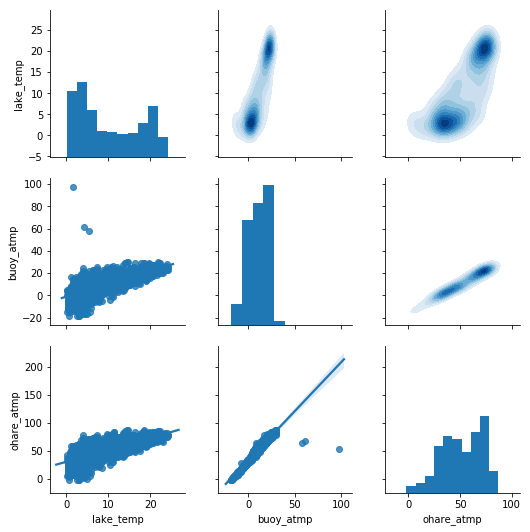

In [39]:
g = sns.PairGrid(df[['lake_temp', 'buoy_atmp', 'ohare_atmp']])
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show()

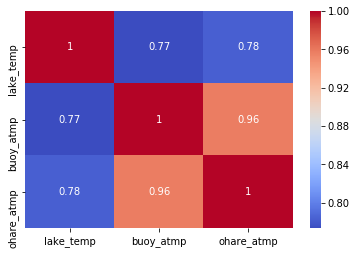

In [41]:
# plt.figure(figsize=(16, 12))
sns.heatmap(df[['lake_temp', 'buoy_atmp', 'ohare_atmp']].corr(), 
            annot=True, cmap='coolwarm');

In [42]:
df.columns

Index(['lake_temp', 'buoy_wdir', 'buoy_wspd', 'buoy_atmp', 'ohare_wspd',
       'ohare_prcp', 'ohare_snfall', 'ohare_sndpth', 'ohare_atmp',
       'ohare_maxtmp', 'ohare_mintmp', 'ohare_w2dir', 'ohare_w2spd'],
      dtype='object')

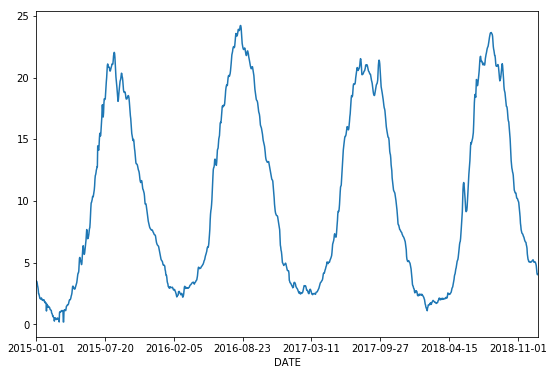

In [51]:
# lake michigan water temperature
plt.figure(figsize=(9,6))
df.lake_temp.plot()


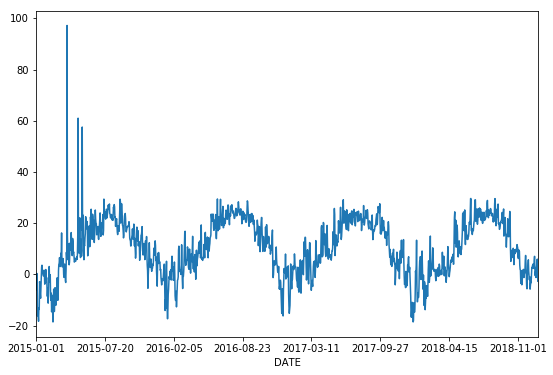

In [53]:
# 
plt.figure(figsize=(9,6))
df.buoy_atmp.plot()

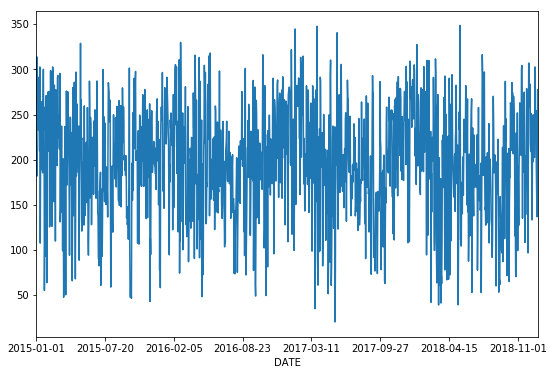

In [55]:
plt.figure(figsize=(9,6))
df.buoy_wdir.plot()

In [56]:
df.columns

Index(['lake_temp', 'buoy_wdir', 'buoy_wspd', 'buoy_atmp', 'ohare_wspd',
       'ohare_prcp', 'ohare_snfall', 'ohare_sndpth', 'ohare_atmp',
       'ohare_maxtmp', 'ohare_mintmp', 'ohare_w2dir', 'ohare_w2spd'],
      dtype='object')

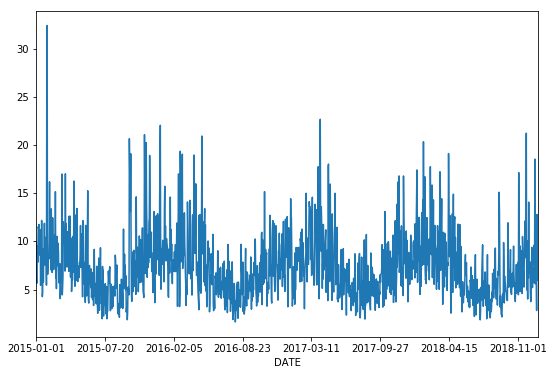

In [58]:
plt.figure(figsize=(9, 6))
df.buoy_wspd.plot()

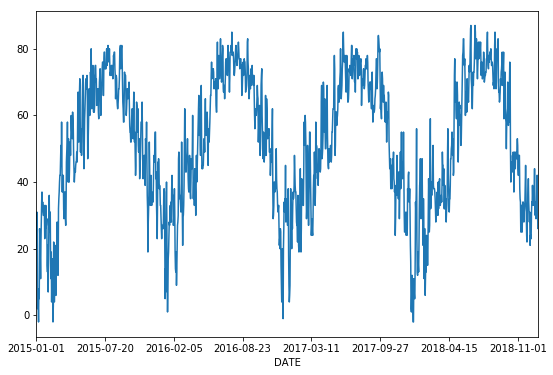

In [60]:
plt.figure(figsize=(9,6))
df.ohare_atmp.plot()

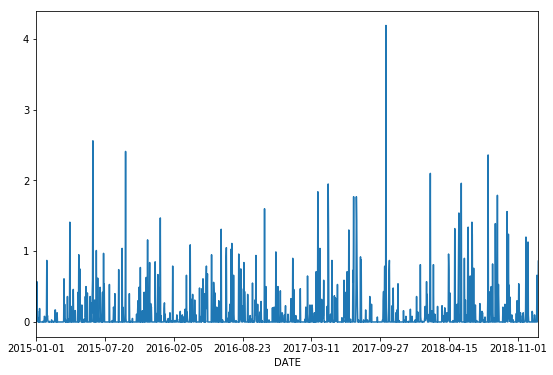

In [62]:
plt.figure(figsize=(9,6))
df.ohare_prcp.plot()

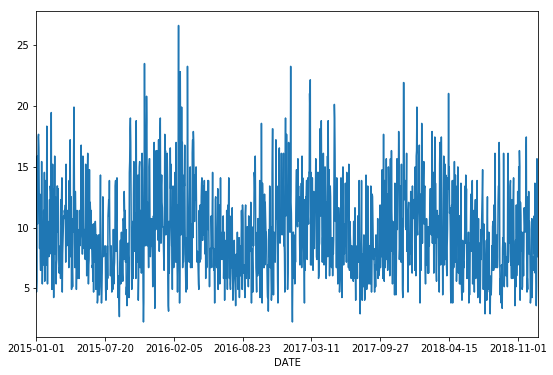

In [64]:
plt.figure(figsize=(9,6))
df.ohare_wspd.plot()

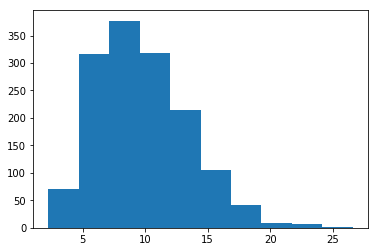

In [74]:
plt.hist(df.ohare_wspd);

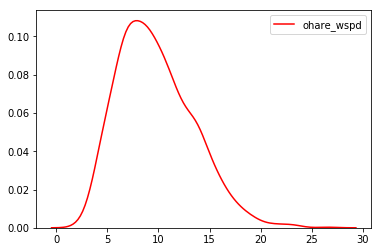

In [73]:
sns.kdeplot(df.ohare_wspd, color='r');
# plt.hist(df.ohare_wspd);


In [75]:
df.ohare_wspd.normalize=True

In [77]:
df.head()

,lake_temp,buoy_wdir,buoy_wspd,buoy_atmp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
DATE,,,,,,,,,,,,,
2015-01-01,3.53,238.333333,9.890476,-5.928571,14.54,0.00,0.0,0.0,20.0,32,14,240,23.9
2015-01-02,3.50,216.086957,6.230435,-2.204348,4.70,0.00,0.0,0.0,26.0,34,15,150,12.1
2015-01-03,3.49,181.916667,5.654167,0.395833,5.59,0.57,0.4,0.0,31.0,34,29,140,13.0
2015-01-04,3.36,313.750000,8.779167,-1.545833,15.88,0.13,2.2,1.2,29.0,33,2,320,25.9
2015-01-05,3.16,262.166667,9.537500,-16.145833,10.29,0.15,1.8,2.0,2.0,6,-3,310,21.9


In [86]:
# converting the buoy air temp to degrees F
df['buoy_atmp'] = df['buoy_atmp']*9/5 + 32

In [87]:
df.head()

,lake_temp,buoy_wdir,buoy_wspd,buoy_atmp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_atmp,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
DATE,,,,,,,,,,,,,
2015-01-01,3.53,238.333333,9.890476,21.328571,14.54,0.00,0.0,0.0,20.0,32,14,240,23.9
2015-01-02,3.50,216.086957,6.230435,28.032174,4.70,0.00,0.0,0.0,26.0,34,15,150,12.1
2015-01-03,3.49,181.916667,5.654167,32.712500,5.59,0.57,0.4,0.0,31.0,34,29,140,13.0
2015-01-04,3.36,313.750000,8.779167,29.217500,15.88,0.13,2.2,1.2,29.0,33,2,320,25.9
2015-01-05,3.16,262.166667,9.537500,2.937500,10.29,0.15,1.8,2.0,2.0,6,-3,310,21.9


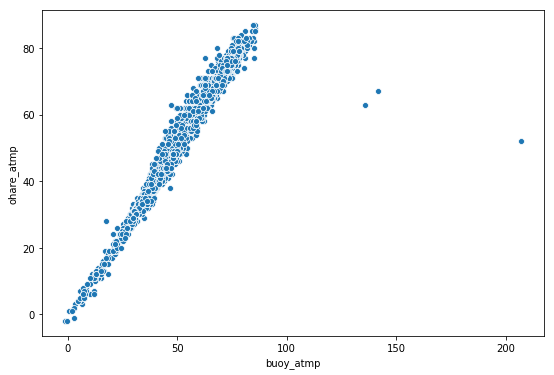

In [89]:
plt.figure(figsize=(9,6))
sns.scatterplot(df['buoy_atmp'], df['ohare_atmp'])

## Jan 01, 2000 - Dec 31, 2018, garden_ohare_lake

### Data Sources
#### [CHICAGO OHARE INTERNATIONAL AIRPORT, IL US](https://www.ncdc.noaa.gov/cdo-web/results)
 - Source: [National Centers for Environmental Information](https://www.ncdc.noaa.gov/cdo-web/search)  
 - [GHCN (Global Historical Climatology Network) – Daily Documentation](https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf)
  - ID	GHCND:USW00094846  
    41.995 N 87.9336 W 

#### [Station FSTI2 - Foster Ave., Chicago, IL](https://www.ndbc.noaa.gov/station_page.php?station=fsti2)
 - Source: [National Data Buoy Center](https://www.ndbc.noaa.gov/)

 - Owned and maintained by [Chicago Park District](https://www.ndbc.noaa.gov/ndbcexit.php?url=https://wqdatalive.com/public/16&blurb=Chicago+Park+District)  
    41.976 N 87.648 W (41°58'35" N 87°38'51" W)
    
#### [Lake Michigan](https://www.google.com/search?q=lake+michigan&oq=lake+michigan&aqs=chrome.0.69i59j69i60l3j69i59j0.3015j0j9&sourceid=chrome&ie=UTF-8)
 - Source: [Great Lakes Statistics: Average Surface Water Temperature from the Great Lakes Surface Environmental Analysis (GLSEA)](https://coastwatch.glerl.noaa.gov/statistic/statistic.html)
 - 44.0 -87.0 (44° 00' 0.00" N 87° 00' 0.00" W)
 - [Data Set for 2018](https://coastwatch.glerl.noaa.gov/ftp/glsea/avgtemps/2018/glsea-temps2018_1024.dat)

#### Data Dictionary

 - **lake_temp (Celsius)** - Average Daily Surface Water Temperature for Lake Michigan  
 
 - **garden_prcp** - Precipitation (PRCP) (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
 - **garden_maxtmp** - Maximum temperature (TMAX) (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths
on Daily Form pdf file
 - **garden_mintmp** - Minimum temperature (TMIN) (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file
 - **garden_tobs** - 
 
 - **buoy_wdir (degT)** - Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD. (WDIR) 
 - **buoy_wspd (m/s)** - Wind speed averaged over an eight-minute period for buoys and a two-minute period for land stations. Reported Hourly.
 - **buoy_atmp (Celsius)** - Air temperature  
 
 - **ohare_wspd** - Average daily wind speed (AWND) (meters per second or miles per hour as per user preference) 
 - **ohare_atmp** - Average Temperature (TAVG) ()
 - **ohare_w2dir** - Direction of fastest 2-minute wind (WDF2) (degrees)
 - **ohare_w2spd** - Fastest 2-minute wind speed (WSF2) (miles per hour or meters per second as per user preference)

 "The five core values are:"
 - **ohare_prcp** - Precipitation (PRCP) (mm or inches as per user preference, inches to hundredths on Daily Form pdf file)
 - **ohare_snfall** - Snowfall (SNOW) (mm or inches as per user preference, inches to tenths on Daily Form pdf file)
 - **ohare_sndpth** - Snow depth (SNWD) (mm or inches as per user preference, inches on Daily Form pdf file) 
 - **ohare_maxtmp** - Maximum temperature (TMAX) (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths
on Daily Form pdf file
 - **ohare_mintmp** - Minimum temperature (TMIN) (Fahrenheit or Celsius as per user preference, Fahrenheit to tenths on Daily Form pdf file
 
 Feature Engineering
 - **target** - absolute difference between the precipitation measurements at Ohare and the garden ( ohare_prcp - garden_prcp )
 - **garden_medtmp** - Median daily temperature at the Garden/ midpoint between the max and min temperatures ( (garden_maxtmp + garden_mintmp)/2 )
 - **ohare_medtmp** - Median daily temperature at ohare/ midpoint between the max and min temperatures ( (ohare_maxtmp + ohare_mintmp)/2 )
 - **tmpdiff** - difference between the median temperatures at ohare and the garden ( ohare_medtmp - garden_medtmp )
  
 [Bouy Data Dictionary](https://www.ndbc.noaa.gov/measdes.shtml)  
 [O'Hare Airport Data Dictionary](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt)  
 [Botanical Garden Data Dictionary](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt)

### Notes:
 - Hottest day during this time period: 
   - [The hottest recorded day in Chicago is only 105 degF, on July 24, 1934](http://www.encyclopedia.chicagohistory.org/pages/1417.html)
 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018.csv')
print(data.shape)
print()
print(data.columns)
print()
print(data.dtypes)
print()
print(data.isnull().sum())
data.head()

(8763, 16)

Index(['DATE', 'garden_prcp', 'garden_snfall', 'garden_sndpth',
       'garden_maxtmp', 'garden_mintmp', 'garden_tobs', 'lake_temp',
       'ohare_wspd', 'ohare_prcp', 'ohare_snfall', 'ohare_sndpth',
       'ohare_maxtmp', 'ohare_mintmp', 'ohare_w2dir', 'ohare_w2spd'],
      dtype='object')

DATE              object
garden_prcp      float64
garden_snfall    float64
garden_sndpth    float64
garden_maxtmp    float64
garden_mintmp    float64
garden_tobs      float64
lake_temp        float64
ohare_wspd       float64
ohare_prcp       float64
ohare_snfall     float64
ohare_sndpth     float64
ohare_maxtmp       int64
ohare_mintmp       int64
ohare_w2dir      float64
ohare_w2spd      float64
dtype: object

DATE               0
garden_prcp       28
garden_snfall    313
garden_sndpth    358
garden_maxtmp     10
garden_mintmp     11
garden_tobs       17
lake_temp          0
ohare_wspd         7
ohare_prcp         1
ohare_snfall     186
ohare_sndpth     376
ohare_maxtmp       0
ohare_m

,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_w2dir,ohare_w2spd
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,24.0,5.02,16.11,0.02,0.2,1.0,27,11,NaN,NaN
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,12.0,4.95,14.09,0.00,0.0,1.0,21,8,NaN,NaN
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,11.0,0.20,12.53,0.00,0.0,1.0,18,3,NaN,NaN
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,NaN,NaN
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,NaN,NaN


In [3]:
# We drop these columns.
data.drop(columns=['ohare_w2dir', 'ohare_w2spd'], inplace=True)

In [4]:
data.dropna(inplace=True)
data.shape

(7923, 14)

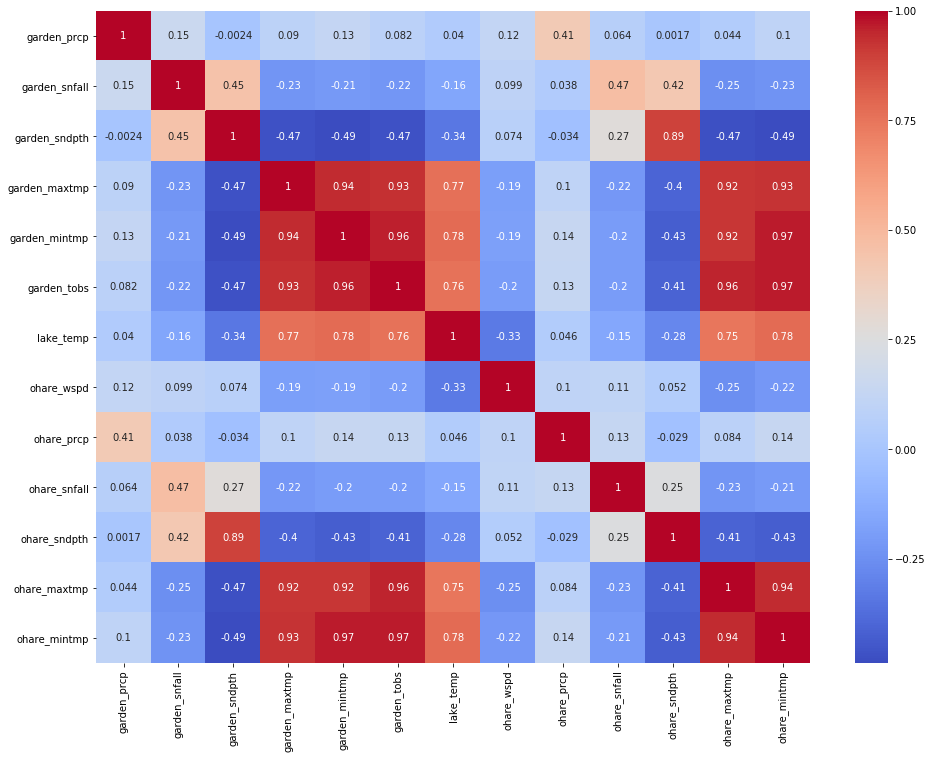

In [5]:
plt.figure(figsize=(16, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm');

In [6]:
data['target'] = abs(data.ohare_prcp - data.garden_prcp)
print(data.shape)
data.head()

(7923, 15)


,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,target
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,24.0,5.02,16.11,0.02,0.2,1.0,27,11,0.09
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,12.0,4.95,14.09,0.00,0.0,1.0,21,8,0.00
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,11.0,0.20,12.53,0.00,0.0,1.0,18,3,0.00
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,0.00
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,0.00


In [7]:
# sns.pairplot(data[['garden_maxtmp', 'target']], hue='target', palette = 'coolwarm');

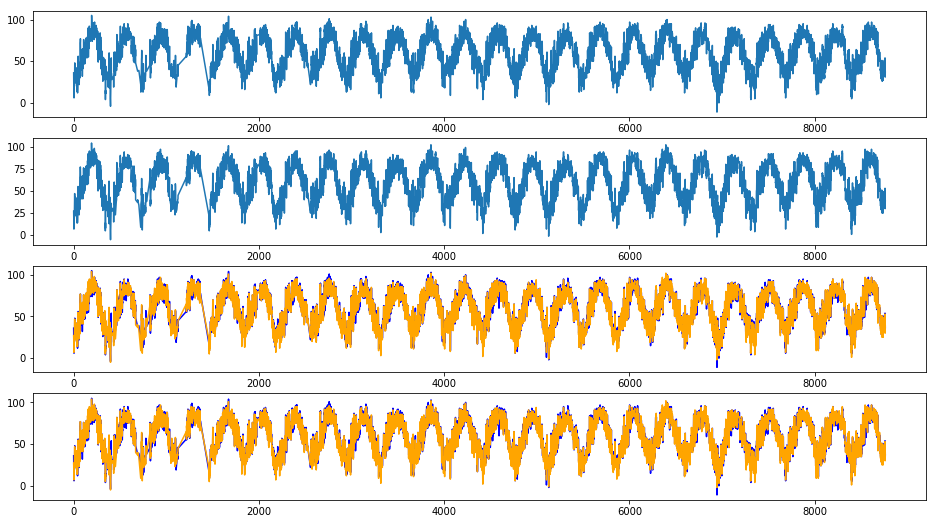

In [8]:
fig = plt.figure(figsize=(16,9))


ax1 = fig.add_subplot(411)
ax1.plot(data.garden_maxtmp)

ax2 = fig.add_subplot(412)
ax2.plot(data.ohare_maxtmp)

ax3 = fig.add_subplot(413)
ax3.plot(data.garden_maxtmp, color = 'b')
ax3.plot(data.ohare_maxtmp, color = 'orange')

ax4 = fig.add_subplot(414)
ax4.plot(data.garden_maxtmp, color = 'b')
ax4.plot(data.ohare_maxtmp, color = 'orange')

plt.show();

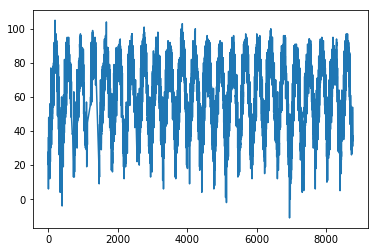

In [9]:
plt.plot(data.garden_maxtmp)

In [10]:
(data.garden_maxtmp - data.garden_mintmp).mean()

18.778492995077624

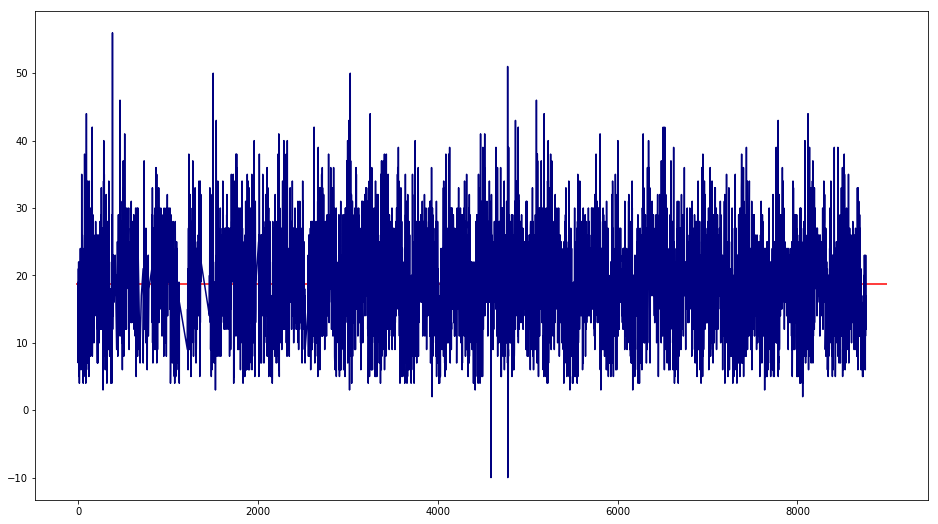

In [11]:
plt.figure(figsize=(16,9))
plt.hlines(y=(data.garden_maxtmp - data.garden_mintmp).mean(), xmin=-25, xmax = 9000, colors='red')
plt.plot(data.garden_maxtmp - data.garden_mintmp, c='navy')


In [12]:
data['garden_medtmp'] = (data.garden_maxtmp + data.garden_mintmp)/2

In [13]:
print(data.shape)
data.head()

(7923, 16)


,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,target,garden_medtmp
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,24.0,5.02,16.11,0.02,0.2,1.0,27,11,0.09,28.5
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,12.0,4.95,14.09,0.00,0.0,1.0,21,8,0.00,15.5
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,11.0,0.20,12.53,0.00,0.0,1.0,18,3,0.00,17.5
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,0.00,8.5
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,0.00,2.5


In [14]:
data.columns

Index(['DATE', 'garden_prcp', 'garden_snfall', 'garden_sndpth',
       'garden_maxtmp', 'garden_mintmp', 'garden_tobs', 'lake_temp',
       'ohare_wspd', 'ohare_prcp', 'ohare_snfall', 'ohare_sndpth',
       'ohare_maxtmp', 'ohare_mintmp', 'target', 'garden_medtmp'],
      dtype='object')

In [15]:
data = data[['DATE', 'garden_prcp', 'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp', 
             'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp', 'ohare_snfall', 
             'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp', 'target']]

print(data.shape)
data.head()

(7923, 16)


,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,target
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,0.09
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,0.00
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,0.00
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,0.00
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,0.00


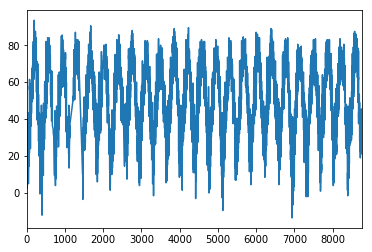

In [16]:
data.garden_medtmp.plot()

In [17]:
data['ohare_medtmp'] = (data.ohare_maxtmp + data.ohare_mintmp)/2
print(data.shape)
data.head()

(7923, 17)


,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,target,ohare_medtmp
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,0.09,19.0
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,0.00,14.5
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,0.00,10.5
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,0.00,3.0
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,0.00,9.0


In [18]:
data.columns

Index(['DATE', 'garden_prcp', 'garden_snfall', 'garden_sndpth',
       'garden_maxtmp', 'garden_mintmp', 'garden_medtmp', 'garden_tobs',
       'lake_temp', 'ohare_wspd', 'ohare_prcp', 'ohare_snfall', 'ohare_sndpth',
       'ohare_maxtmp', 'ohare_mintmp', 'target', 'ohare_medtmp'],
      dtype='object')

In [19]:
data = data[['DATE', 'garden_prcp', 'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp',
       'ohare_mintmp', 'ohare_medtmp', 'target']]

data.head()

,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp,target
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0,0.09
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,14.5,0.00
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,10.5,0.00
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,3.0,0.00
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,9.0,0.00


In [20]:
data['tmpdiff'] = abs(data.ohare_medtmp - data.garden_medtmp)
print(data.shape)
data.head()

(7923, 18)


,DATE,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp,target,tmpdiff
0,1995-01-01,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0,0.09,9.5
1,1995-01-02,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,14.5,0.00,1.0
2,1995-01-03,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,10.5,0.00,7.0
3,1995-01-04,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,3.0,0.00,5.5
4,1995-01-05,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,9.0,0.00,6.5


In [21]:
data.columns

Index(['DATE', 'garden_prcp', 'garden_snfall', 'garden_sndpth',
       'garden_maxtmp', 'garden_mintmp', 'garden_medtmp', 'garden_tobs',
       'lake_temp', 'ohare_wspd', 'ohare_prcp', 'ohare_snfall', 'ohare_sndpth',
       'ohare_maxtmp', 'ohare_mintmp', 'ohare_medtmp', 'target', 'tmpdiff'],
      dtype='object')

In [22]:
data = data[['DATE', 'target', 'tmpdiff', 'garden_prcp', 'garden_snfall', 'garden_sndpth',
       'garden_maxtmp', 'garden_mintmp', 'garden_medtmp', 'garden_tobs',
       'lake_temp', 'ohare_wspd', 'ohare_prcp', 'ohare_snfall', 'ohare_sndpth',
       'ohare_maxtmp', 'ohare_mintmp', 'ohare_medtmp']]

data.head()

,DATE,target,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,1995-01-01,0.09,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0
1,1995-01-02,0.00,1.0,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,14.5
2,1995-01-03,0.00,7.0,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,10.5
3,1995-01-04,0.00,5.5,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,3.0
4,1995-01-05,0.00,6.5,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,9.0


In [23]:
data.shape

(7923, 18)

In [24]:
data.isnull().sum()

DATE             0
target           0
tmpdiff          0
garden_prcp      0
garden_snfall    0
garden_sndpth    0
garden_maxtmp    0
garden_mintmp    0
garden_medtmp    0
garden_tobs      0
lake_temp        0
ohare_wspd       0
ohare_prcp       0
ohare_snfall     0
ohare_sndpth     0
ohare_maxtmp     0
ohare_mintmp     0
ohare_medtmp     0
dtype: int64

In [25]:
data['garden_didrain'] = (data.garden_prcp > 0).astype('int')
data.head()

,DATE,target,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp,garden_didrain
0,1995-01-01,0.09,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0,1
1,1995-01-02,0.00,1.0,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,14.5,0
2,1995-01-03,0.00,7.0,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,10.5,0
3,1995-01-04,0.00,5.5,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,3.0,0
4,1995-01-05,0.00,6.5,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,9.0,0


In [26]:
data['ohare_didrain'] = (data.ohare_prcp > 0).astype('int')
data.head()

,DATE,target,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp,garden_didrain,ohare_didrain
0,1995-01-01,0.09,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0,1,1
1,1995-01-02,0.00,1.0,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,14.5,0,0
2,1995-01-03,0.00,7.0,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,10.5,0,0
3,1995-01-04,0.00,5.5,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,3.0,0,0
4,1995-01-05,0.00,6.5,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,9.0,0,0


In [27]:
data.columns

Index(['DATE', 'target', 'tmpdiff', 'garden_prcp', 'garden_snfall',
       'garden_sndpth', 'garden_maxtmp', 'garden_mintmp', 'garden_medtmp',
       'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp', 'ohare_snfall',
       'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp', 'ohare_medtmp',
       'garden_didrain', 'ohare_didrain'],
      dtype='object')

In [28]:
data = data[['DATE', 'target', 'garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp', 'garden_snfall',
       'garden_sndpth', 'garden_maxtmp', 'garden_mintmp', 'garden_medtmp',
       'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp', 'ohare_snfall',
       'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp', 'ohare_medtmp']]

data.head()

,DATE,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,1995-01-01,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0
1,1995-01-02,0.00,0,0,1.0,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,14.5
2,1995-01-03,0.00,0,0,7.0,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,10.5
3,1995-01-04,0.00,0,0,5.5,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,3.0
4,1995-01-05,0.00,0,0,6.5,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,9.0


In [29]:
data.head(15)

,DATE,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,1995-01-01,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0
1,1995-01-02,0.00,0,0,1.0,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,14.5
2,1995-01-03,0.00,0,0,7.0,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,10.5
3,1995-01-04,0.00,0,0,5.5,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,3.0
4,1995-01-05,0.00,0,0,6.5,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,9.0
5,1995-01-06,0.22,1,1,9.0,0.03,0.3,1.0,24.0,3.0,13.5,24.0,0.20,10.51,0.25,3.3,1.0,27,18,22.5
6,1995-01-07,0.01,1,0,3.0,0.01,2.0,3.0,26.0,19.0,22.5,20.0,0.20,12.30,0.00,0.0,3.0,27,12,19.5
7,1995-01-08,0.00,0,0,5.5,0.00,0.0,3.0,28.0,6.0,17.0,9.0,0.20,8.50,0.00,0.0,3.0,19,4,11.5
8,1995-01-09,0.11,0,1,4.5,0.00,0.0,2.0,20.0,8.0,14.0,15.0,4.10,7.38,0.11,1.9,3.0,25,12,18.5
9,1995-01-10,0.17,1,0,4.0,0.17,1.8,4.0,23.0,14.0,18.5,22.0,3.97,7.38,0.00,0.0,4.0,29,16,22.5


In [30]:
data.shape

(7923, 20)

In [31]:
# there are 2253 different days where it either rained at the garden and not ohare, or it rained at ohare and not the
# garden.
data[data.garden_didrain != data.ohare_didrain].shape

(2253, 20)

In [32]:
data.head(25)

,DATE,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,1995-01-01,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0
1,1995-01-02,0.00,0,0,1.0,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,14.5
2,1995-01-03,0.00,0,0,7.0,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,10.5
3,1995-01-04,0.00,0,0,5.5,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,3.0
4,1995-01-05,0.00,0,0,6.5,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,9.0
5,1995-01-06,0.22,1,1,9.0,0.03,0.3,1.0,24.0,3.0,13.5,24.0,0.20,10.51,0.25,3.3,1.0,27,18,22.5
6,1995-01-07,0.01,1,0,3.0,0.01,2.0,3.0,26.0,19.0,22.5,20.0,0.20,12.30,0.00,0.0,3.0,27,12,19.5
7,1995-01-08,0.00,0,0,5.5,0.00,0.0,3.0,28.0,6.0,17.0,9.0,0.20,8.50,0.00,0.0,3.0,19,4,11.5
8,1995-01-09,0.11,0,1,4.5,0.00,0.0,2.0,20.0,8.0,14.0,15.0,4.10,7.38,0.11,1.9,3.0,25,12,18.5
9,1995-01-10,0.17,1,0,4.0,0.17,1.8,4.0,23.0,14.0,18.5,22.0,3.97,7.38,0.00,0.0,4.0,29,16,22.5


In [33]:
data.tail()

,DATE,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
8758,2018-12-27,0.66,0,1,8.5,0.00,0.0,0.0,49.0,26.0,37.5,40.0,4.17,15.66,0.66,0.0,0.0,53,39,46.0
8759,2018-12-28,0.39,1,1,4.0,0.47,0.0,0.0,54.0,37.0,45.5,38.0,4.04,15.21,0.08,0.2,0.0,53,30,41.5
8760,2018-12-29,0.06,1,1,6.0,0.11,0.1,0.0,38.0,26.0,32.0,27.0,4.03,7.61,0.05,0.9,0.0,30,22,26.0
8761,2018-12-30,0.03,1,0,2.5,0.03,0.3,0.0,31.0,19.0,25.0,21.0,4.07,11.18,0.00,0.0,0.0,36,19,27.5
8762,2018-12-31,0.80,1,1,6.0,0.06,0.0,1.0,37.0,21.0,29.0,36.0,4.07,8.72,0.86,0.0,0.0,39,31,35.0


In [34]:
data.to_csv('data/merged/garden_ohare_lake/jan011995_dec312018_correlated_but_clean.csv', index=False)

In [41]:
data = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_correlated_but_clean.csv')
print(data.shape)
data.head()

(7923, 20)


,DATE,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,1995-01-01,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0
1,1995-01-02,0.00,0,0,1.0,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,14.5
2,1995-01-03,0.00,0,0,7.0,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,10.5
3,1995-01-04,0.00,0,0,5.5,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,3.0
4,1995-01-05,0.00,0,0,6.5,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,9.0


## Now, uncorrelating the full dataset

In [42]:
data.drop(columns='DATE', inplace=True)
data.head()

,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0
1,0.00,0,0,1.0,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,14.5
2,0.00,0,0,7.0,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,10.5
3,0.00,0,0,5.5,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,3.0
4,0.00,0,0,6.5,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,9.0


In [43]:
old_index = data.index.values
new_index = np.random.shuffle(old_index)

data.index.values
data.set_index(data.index.values, inplace=True)

sorted_data = data.sort_index(ascending=True)
sorted_data.head()

,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,0.00,0,0,7.5,0.00,0.0,0.0,51.0,38.0,44.5,48.0,2.63,13.65,0.00,0.0,0.0,63,41,52.0
1,0.00,0,0,1.5,0.00,0.0,3.0,35.0,17.0,26.0,34.0,4.88,11.86,0.00,0.0,0.0,35,20,27.5
2,1.71,1,1,6.5,1.95,0.0,0.0,61.0,42.0,51.5,43.0,3.07,16.78,0.24,0.0,0.0,50,40,45.0
3,0.00,0,0,2.5,0.00,0.0,0.0,77.0,61.0,69.0,66.0,18.92,10.96,0.00,0.0,0.0,74,59,66.5
4,0.79,0,1,2.5,0.00,0.0,0.0,91.0,65.0,78.0,77.0,20.90,7.83,0.79,0.0,0.0,85,66,75.5


In [44]:
print(data.shape)
data.head()

(7923, 19)


,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
7165,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0
4918,0.00,0,0,1.0,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,14.5
4270,0.00,0,0,7.0,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,10.5
6773,0.00,0,0,5.5,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,3.0
4395,0.00,0,0,6.5,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,9.0


In [45]:
data.to_csv('data/merged/garden_ohare_lake/jan011995_dec312018_uncorrelated_but_clean.csv', index=False)

In [46]:
data = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_uncorrelated_but_clean.csv')
print(data.shape)
data.head()

(7923, 19)


,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0
1,0.00,0,0,1.0,0.00,0.0,1.0,24.0,7.0,15.5,12.0,4.95,14.09,0.00,0.0,1.0,21,8,14.5
2,0.00,0,0,7.0,0.00,0.0,1.0,25.0,10.0,17.5,11.0,0.20,12.53,0.00,0.0,1.0,18,3,10.5
3,0.00,0,0,5.5,0.00,0.0,1.0,18.0,-1.0,8.5,1.0,0.20,12.30,0.00,0.0,1.0,7,-1,3.0
4,0.00,0,0,6.5,0.00,0.0,1.0,6.0,-1.0,2.5,3.0,0.20,16.33,0.00,0.0,0.0,19,-1,9.0


## Now, we reduce our set down to only the dates where it rained on both days.

In [37]:
data = data[(data.garden_didrain == 1) & (data.ohare_didrain == 1)]
print(data.shape)
data.head()

(1648, 20)


,DATE,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,1995-01-01,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0
5,1995-01-06,0.22,1,1,9.0,0.03,0.3,1.0,24.0,3.0,13.5,24.0,0.20,10.51,0.25,3.3,1.0,27,18,22.5
12,1995-01-13,0.82,1,1,4.5,0.02,0.0,0.0,48.0,32.0,40.0,33.0,3.63,9.40,0.84,0.0,0.0,38,33,35.5
13,1995-01-14,1.14,1,1,2.5,1.94,0.0,0.0,37.0,32.0,34.5,36.0,3.52,17.00,0.80,0.0,0.0,39,35,37.0
18,1995-01-19,0.63,1,1,0.0,0.18,0.8,1.0,39.0,29.0,34.0,35.0,3.03,19.01,0.81,2.4,1.0,36,32,34.0


In [38]:
data.to_csv('data/merged/garden_ohare_lake/jan011995_dec312018_correlated_both_rain.csv', index=False)

In [39]:
rain = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_correlated_both_rain.csv')
print(rain.shape)
rain.head()

(1648, 20)


,DATE,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,1995-01-01,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,5.02,16.11,0.02,0.2,1.0,27,11,19.0
1,1995-01-06,0.22,1,1,9.0,0.03,0.3,1.0,24.0,3.0,13.5,24.0,0.20,10.51,0.25,3.3,1.0,27,18,22.5
2,1995-01-13,0.82,1,1,4.5,0.02,0.0,0.0,48.0,32.0,40.0,33.0,3.63,9.40,0.84,0.0,0.0,38,33,35.5
3,1995-01-14,1.14,1,1,2.5,1.94,0.0,0.0,37.0,32.0,34.5,36.0,3.52,17.00,0.80,0.0,0.0,39,35,37.0
4,1995-01-19,0.63,1,1,0.0,0.18,0.8,1.0,39.0,29.0,34.0,35.0,3.03,19.01,0.81,2.4,1.0,36,32,34.0


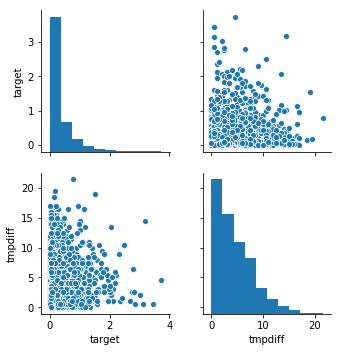

In [40]:
# check the distribution of the target data
sns.pairplot(data[['target', 'tmpdiff']]);

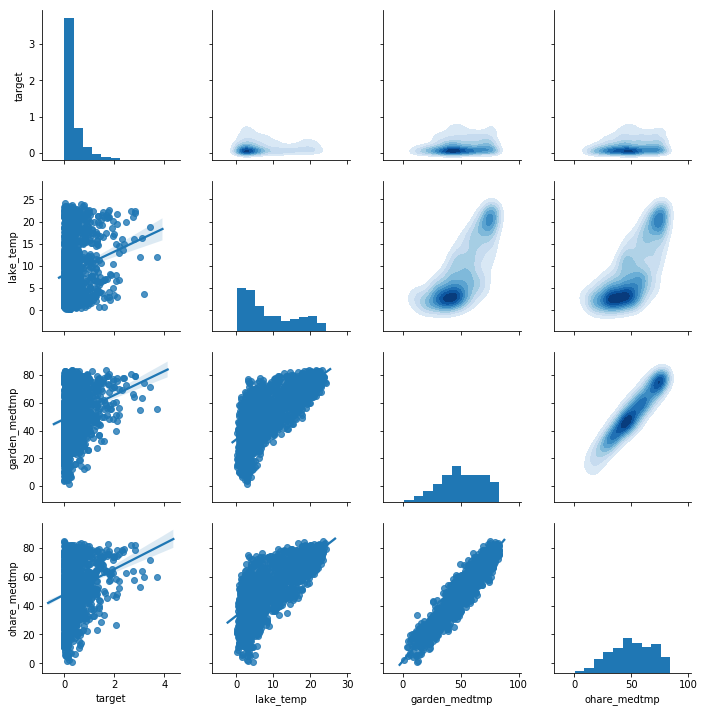

In [45]:
g = sns.PairGrid(data[['target', 'lake_temp', 'garden_medtmp', 'ohare_medtmp']])
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show()

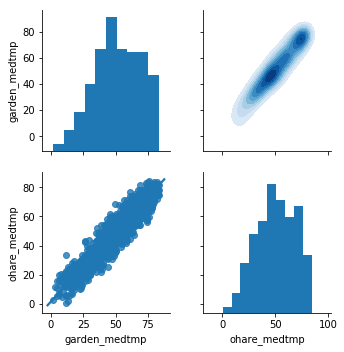

In [44]:
g = sns.PairGrid(data[['garden_medtmp', 'ohare_medtmp']])
g = g.map_lower(sns.regplot)    # Regression plots in lower triangle.
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle.
g = g.map_diag(plt.hist)        # Histograms along diagonal.

plt.show()

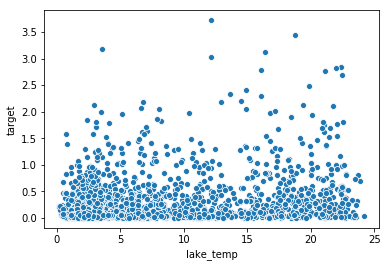

In [47]:
sns.scatterplot(data.lake_temp, data.target)

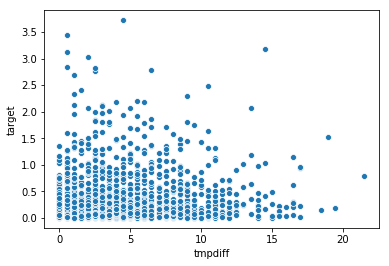

In [49]:
sns.scatterplot(data.tmpdiff, data.target)

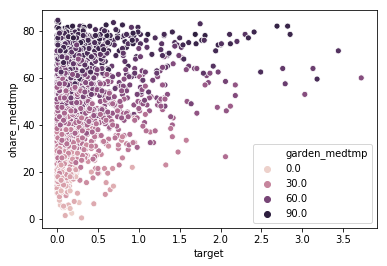

In [50]:
sns.scatterplot(data.target, data.ohare_medtmp, data.garden_medtmp)

In [51]:
# Note, the hottest recorded day in Chicago is only 105 degF, on July 24, 1934
data[data.garden_maxtmp == data.garden_maxtmp.max()]

,DATE,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
3732,2006-08-03,0.32,1,1,8.5,0.77,0.0,0.0,100.0,67.0,83.5,70.0,23.14,5.59,0.45,0.0,0.0,83,67,75.0


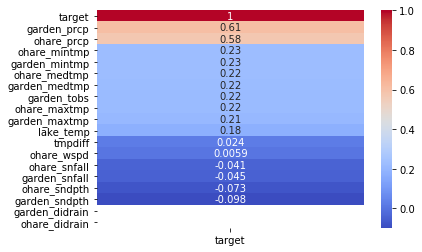

In [52]:
# this will generate a single column heatmap showing the correlations between the target and the remaining variables

# need a dataframe called data and a column called 'status'
corr = data.corr()
corr_sort = corr.sort_values(by = ['target'], axis = 0, ascending=False)
corr_sort
sns.heatmap(corr_sort[['target']], annot=True, cmap='coolwarm')

In [53]:
data.dtypes

DATE               object
target            float64
garden_didrain      int64
ohare_didrain       int64
tmpdiff           float64
garden_prcp       float64
garden_snfall     float64
garden_sndpth     float64
garden_maxtmp     float64
garden_mintmp     float64
garden_medtmp     float64
garden_tobs       float64
lake_temp         float64
ohare_wspd        float64
ohare_prcp        float64
ohare_snfall      float64
ohare_sndpth      float64
ohare_maxtmp        int64
ohare_mintmp        int64
ohare_medtmp      float64
dtype: object

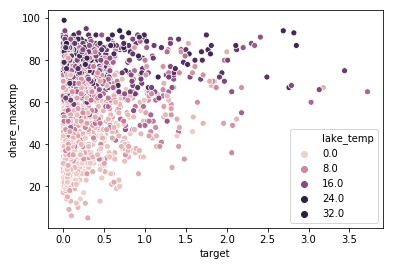

In [55]:
sns.scatterplot(data.target, data.ohare_maxtmp, data.lake_temp)

In [56]:
data.columns

Index(['DATE', 'target', 'garden_didrain', 'ohare_didrain', 'tmpdiff',
       'garden_prcp', 'garden_snfall', 'garden_sndpth', 'garden_maxtmp',
       'garden_mintmp', 'garden_medtmp', 'garden_tobs', 'lake_temp',
       'ohare_wspd', 'ohare_prcp', 'ohare_snfall', 'ohare_sndpth',
       'ohare_maxtmp', 'ohare_mintmp', 'ohare_medtmp'],
      dtype='object')

In [60]:
data.ohare_prcp.max()

6.86

In [61]:
cross_reference = pd.read_csv('data/daily-summaries-2019-05-09T13-47-59.csv')
print(cross_reference.shape)
print()
print(cross_reference.columns)
print()
print(cross_reference.dtypes)
print()
cross_reference.head()

(14117, 7)

Index(['STATION', 'DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

STATION     object
DATE        object
PRCP       float64
SNOW       float64
SNWD       float64
TMAX       float64
TMIN       float64
dtype: object



,STATION,DATE,PRCP,SNOW,SNWD,TMAX,TMIN
0,USW00094846,1/1/00,0.00,0.0,0.0,48.0,35.0
1,USW00094846,1/2/00,0.01,0.0,0.0,60.0,35.0
2,USW00094846,1/3/00,0.25,0.4,0.0,38.0,32.0
3,USW00094846,1/4/00,0.00,0.0,0.0,33.0,23.0
4,USW00094846,1/5/00,0.00,0.0,0.0,26.0,13.0


In [65]:
# Yup, sure enough, everything checks out.
cross_reference.PRCP.max()

6.86

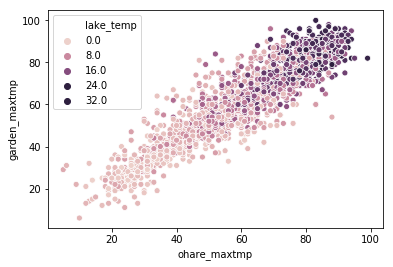

In [67]:
sns.scatterplot(data.ohare_maxtmp, data.garden_maxtmp, data.lake_temp)

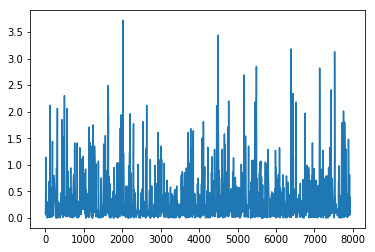

In [68]:
plt.plot(data.target)

In [69]:
data.lake_temp = data.lake_temp*9/5 + 32

In [98]:
data.columns

Index(['DATE', 'target', 'garden_didrain', 'ohare_didrain', 'tmpdiff',
       'garden_prcp', 'garden_snfall', 'garden_sndpth', 'garden_maxtmp',
       'garden_mintmp', 'garden_medtmp', 'garden_tobs', 'lake_temp',
       'ohare_wspd', 'ohare_prcp', 'ohare_snfall', 'ohare_sndpth',
       'ohare_maxtmp', 'ohare_mintmp', 'ohare_medtmp'],
      dtype='object')

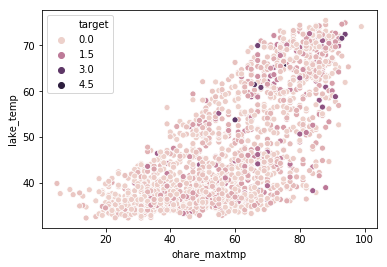

In [102]:
# In this graph we can see that there is a greater difference in the amount of rainfall between the two locations as
# the temperature of the lake and at ohare increases.
sns.scatterplot(x=data.ohare_maxtmp, y=data.lake_temp, hue=data.target);


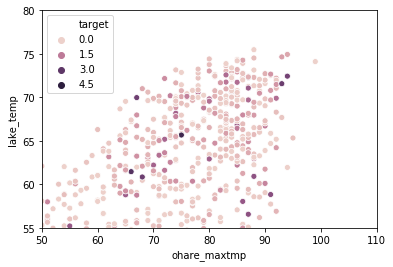

In [103]:
sns.scatterplot(data.ohare_maxtmp, data.lake_temp, data.target);
plt.xlim(50, 110)
plt.ylim(55, 80);

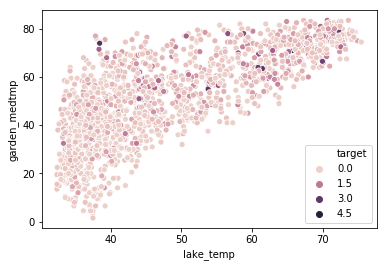

In [104]:
sns.scatterplot(data.lake_temp, data.garden_medtmp, data.target)

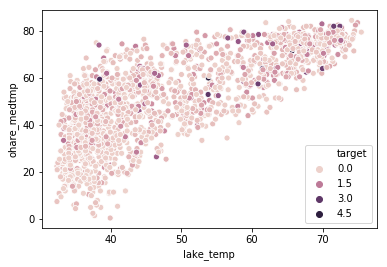

In [105]:
sns.scatterplot(data.lake_temp, data.ohare_medtmp, data.target)

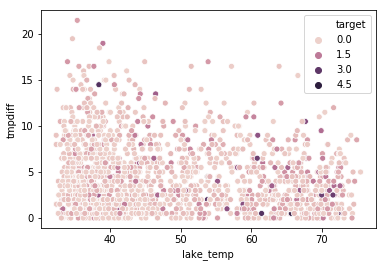

In [106]:
sns.scatterplot(data.lake_temp, data.tmpdiff, data.target)

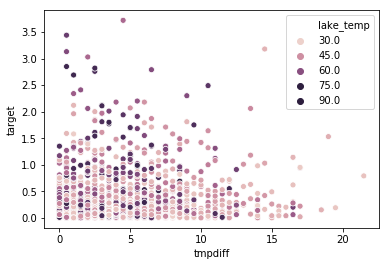

In [107]:
sns.scatterplot(data.tmpdiff, data.target, data.lake_temp)

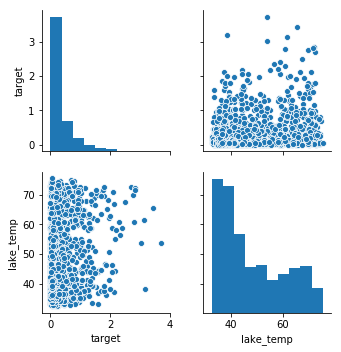

In [108]:
sns.pairplot(data[['target', 'lake_temp']])

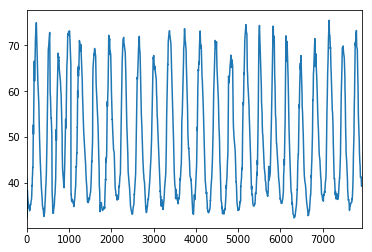

In [109]:
data.lake_temp.plot()

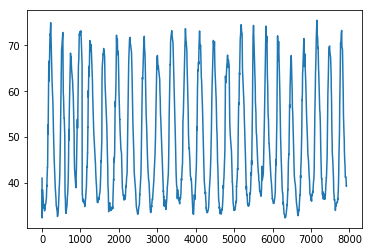

In [110]:
plt.plot(data.lake_temp)

In [111]:
data.DATE = pd.to_datetime(data.DATE)
data.dtypes

DATE              datetime64[ns]
target                   float64
garden_didrain             int64
ohare_didrain              int64
tmpdiff                  float64
garden_prcp              float64
garden_snfall            float64
garden_sndpth            float64
garden_maxtmp            float64
garden_mintmp            float64
garden_medtmp            float64
garden_tobs              float64
lake_temp                float64
ohare_wspd               float64
ohare_prcp               float64
ohare_snfall             float64
ohare_sndpth             float64
ohare_maxtmp               int64
ohare_mintmp               int64
ohare_medtmp             float64
dtype: object

In [112]:
data.set_index('DATE', inplace=True)

In [113]:
data.head()

,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
DATE,,,,,,,,,,,,,,,,,,,
1995-01-01,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,41.036,16.11,0.02,0.2,1.0,27,11,19.0
1995-01-06,0.22,1,1,9.0,0.03,0.3,1.0,24.0,3.0,13.5,24.0,32.360,10.51,0.25,3.3,1.0,27,18,22.5
1995-01-13,0.82,1,1,4.5,0.02,0.0,0.0,48.0,32.0,40.0,33.0,38.534,9.40,0.84,0.0,0.0,38,33,35.5
1995-01-14,1.14,1,1,2.5,1.94,0.0,0.0,37.0,32.0,34.5,36.0,38.336,17.00,0.80,0.0,0.0,39,35,37.0
1995-01-19,0.63,1,1,0.0,0.18,0.8,1.0,39.0,29.0,34.0,35.0,37.454,19.01,0.81,2.4,1.0,36,32,34.0


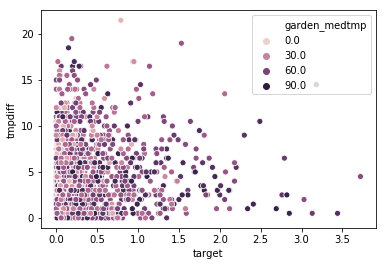

In [114]:
sns.scatterplot(data.target, data.tmpdiff, data.garden_medtmp)

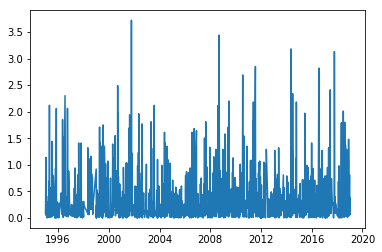

In [115]:
plt.plot(data.target)

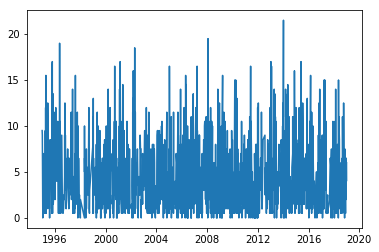

In [116]:
plt.plot(data.tmpdiff)

In [117]:
data.columns

Index(['target', 'garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp',
       'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp',
       'ohare_medtmp'],
      dtype='object')

In [118]:
data.garden_didrain.value_counts()

1    1648
Name: garden_didrain, dtype: int64

In [119]:
data.ohare_didrain.value_counts()

1    1648
Name: ohare_didrain, dtype: int64

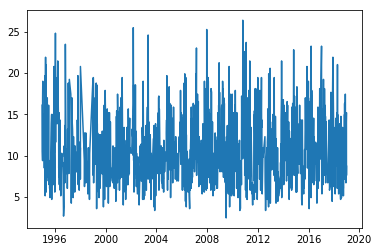

In [120]:
plt.plot(data.ohare_wspd)

## Let's uncorrelate our data, shuffle it, and build a model.

In [121]:
import pandas as pd

In [122]:
print(data.shape)
data.head()

(1648, 19)


,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
DATE,,,,,,,,,,,,,,,,,,,
1995-01-01,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,41.036,16.11,0.02,0.2,1.0,27,11,19.0
1995-01-06,0.22,1,1,9.0,0.03,0.3,1.0,24.0,3.0,13.5,24.0,32.360,10.51,0.25,3.3,1.0,27,18,22.5
1995-01-13,0.82,1,1,4.5,0.02,0.0,0.0,48.0,32.0,40.0,33.0,38.534,9.40,0.84,0.0,0.0,38,33,35.5
1995-01-14,1.14,1,1,2.5,1.94,0.0,0.0,37.0,32.0,34.5,36.0,38.336,17.00,0.80,0.0,0.0,39,35,37.0
1995-01-19,0.63,1,1,0.0,0.18,0.8,1.0,39.0,29.0,34.0,35.0,37.454,19.01,0.81,2.4,1.0,36,32,34.0


In [123]:
data.reset_index(inplace=True)

In [124]:
data.head()

,DATE,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,1995-01-01,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,41.036,16.11,0.02,0.2,1.0,27,11,19.0
1,1995-01-06,0.22,1,1,9.0,0.03,0.3,1.0,24.0,3.0,13.5,24.0,32.360,10.51,0.25,3.3,1.0,27,18,22.5
2,1995-01-13,0.82,1,1,4.5,0.02,0.0,0.0,48.0,32.0,40.0,33.0,38.534,9.40,0.84,0.0,0.0,38,33,35.5
3,1995-01-14,1.14,1,1,2.5,1.94,0.0,0.0,37.0,32.0,34.5,36.0,38.336,17.00,0.80,0.0,0.0,39,35,37.0
4,1995-01-19,0.63,1,1,0.0,0.18,0.8,1.0,39.0,29.0,34.0,35.0,37.454,19.01,0.81,2.4,1.0,36,32,34.0


In [125]:
data.drop(columns='DATE', inplace=True)
data.head()

,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,41.036,16.11,0.02,0.2,1.0,27,11,19.0
1,0.22,1,1,9.0,0.03,0.3,1.0,24.0,3.0,13.5,24.0,32.360,10.51,0.25,3.3,1.0,27,18,22.5
2,0.82,1,1,4.5,0.02,0.0,0.0,48.0,32.0,40.0,33.0,38.534,9.40,0.84,0.0,0.0,38,33,35.5
3,1.14,1,1,2.5,1.94,0.0,0.0,37.0,32.0,34.5,36.0,38.336,17.00,0.80,0.0,0.0,39,35,37.0
4,0.63,1,1,0.0,0.18,0.8,1.0,39.0,29.0,34.0,35.0,37.454,19.01,0.81,2.4,1.0,36,32,34.0


In [126]:
old_index = data.index.values
new_index = np.random.shuffle(old_index)

data.index.values
data.set_index(data.index.values, inplace=True)

sorted_data = data.sort_index(ascending=True)
sorted_data.head()

,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
0,3.44,1,1,0.5,3.20,0.0,0.0,75.0,67.0,71.0,70.0,65.678,9.17,6.64,0.0,0.0,75,68,71.5
1,0.07,1,1,8.0,0.06,0.7,10.0,20.0,-1.0,9.5,20.0,33.908,10.07,0.13,2.5,4.0,22,13,17.5
2,0.22,1,1,5.0,0.33,0.0,0.0,70.0,55.0,62.5,62.0,43.790,7.61,0.11,0.0,0.0,77,58,67.5
3,0.45,1,1,3.0,0.05,0.0,0.0,83.0,60.0,71.5,67.0,69.278,9.17,0.50,0.0,0.0,84,65,74.5
4,0.05,1,1,3.0,0.04,0.0,0.0,56.0,41.0,48.5,43.0,36.122,13.42,0.09,0.0,0.0,49,42,45.5


In [127]:
# no_rain = data[data.garden_didrain == 0][data[data.garden_didrain == 0].ohare_didrain == 0]
# no_rain.head()

In [128]:
data.shape

(1648, 19)

In [129]:
# no_rain.shape

In [130]:
print(data.shape)
data.head()

(1648, 19)


,target,garden_didrain,ohare_didrain,tmpdiff,garden_prcp,garden_snfall,garden_sndpth,garden_maxtmp,garden_mintmp,garden_medtmp,garden_tobs,lake_temp,ohare_wspd,ohare_prcp,ohare_snfall,ohare_sndpth,ohare_maxtmp,ohare_mintmp,ohare_medtmp
15,0.09,1,1,9.5,0.11,1.5,3.0,36.0,21.0,28.5,24.0,41.036,16.11,0.02,0.2,1.0,27,11,19.0
1353,0.22,1,1,9.0,0.03,0.3,1.0,24.0,3.0,13.5,24.0,32.360,10.51,0.25,3.3,1.0,27,18,22.5
511,0.82,1,1,4.5,0.02,0.0,0.0,48.0,32.0,40.0,33.0,38.534,9.40,0.84,0.0,0.0,38,33,35.5
1352,1.14,1,1,2.5,1.94,0.0,0.0,37.0,32.0,34.5,36.0,38.336,17.00,0.80,0.0,0.0,39,35,37.0
872,0.63,1,1,0.0,0.18,0.8,1.0,39.0,29.0,34.0,35.0,37.454,19.01,0.81,2.4,1.0,36,32,34.0


In [131]:
sorted_data.to_csv('data/merged/garden_ohare_lake/jan011995_dec312018_uncorrelated_both_rain.csv', index=False)

(1648, 19)


Index(['garden_didrain', 'ohare_didrain', 'tmpdiff', 'garden_prcp',
       'garden_snfall', 'garden_sndpth', 'garden_maxtmp', 'garden_mintmp',
       'garden_medtmp', 'garden_tobs', 'lake_temp', 'ohare_wspd', 'ohare_prcp',
       'ohare_snfall', 'ohare_sndpth', 'ohare_maxtmp', 'ohare_mintmp',
       'ohare_medtmp'],
      dtype='object')

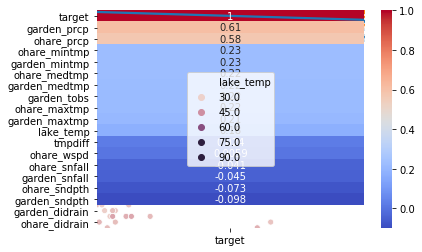

In [132]:
data = pd.read_csv('data/merged/garden_ohare_lake/jan011995_dec312018_uncorrelated_both_rain.csv')
print(data.shape)
data.head()
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

sorted_data.head()

X = sorted_data.drop(columns='target')
y = sorted_data['target']

X.shape

sns.regplot(data.target, data.garden_prcp)

sns.scatterplot(data.target, data.garden_prcp)

sns.scatterplot(data.target, data.ohare_prcp)

sns.scatterplot(data.target, data.garden_medtmp, data.lake_temp)

# this will generate a single column heatmap showing the correlations between the target and the remaining variables

# need a dataframe called data and a column called 'status'
corr = data.corr()
corr_sort = corr.sort_values(by = ['target'], axis = 0, ascending=False)
corr_sort
sns.heatmap(corr_sort[['target']], annot=True, cmap='coolwarm')

y.min()

y.max()

y.value_counts()

lm = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)

lm.fit(X_train, y_train)

preds = lm.predict(X_train)
preds

def MSE(Y, Yhat):
    #calculate the difference between Y and Yhat
    diff = Y - Yhat
    # Square each element in diff
    squared_diff = np.square(diff)
    # Calculate the mean of squared_diff
    mse = np.mean(squared_diff)
    return mse

MSE(y_train, preds)

lm.score(X_train, y_train)

lm.score(X_test, y_test)

preds = lm.predict(X_test)
preds

MSE(y_test, preds)

cross_val_score(lm, X_train, y_train, cv=3).mean()

lm.intercept_

lm.coef_

X.columns